<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/HG_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3 회귀 알고리즘과 모델 규제**
=====================

3-1 k-최근접 이웃 회귀
===========================
> ### 농어의 길이, 높이, 두께를 측정한 데이터로 농어의 무게를 예측해보자
> * k-최근접 이웃 회귀 알고리즘은 분류와 마찬가지로 예측하려는 샘플에 가장 가까운 수치들의 평균값을 구한다

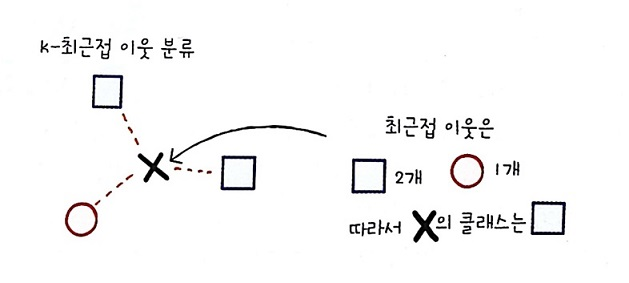

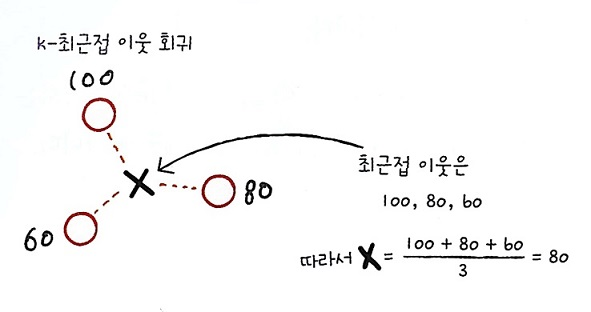

In [ ]:
# 훈련데이터로 농어의 길이와 무게를 활용
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

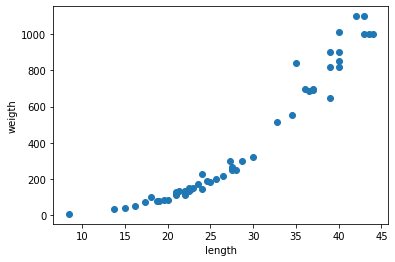

In [ ]:
# 데이터의 형태 확인
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [ ]:
# 훈련세트와 테스트세트로 나누어준다
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

> 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다  
> 앞서 도미와 빙어를 구분할 때는 길이와 무게가 특성이었기 때문에 2차원 배열이었지만,
> 지금은 농어의 길이를 특성으로 하여 무게를 측정하기 때문에 
> 특성 1개의 1차원 배열을 수동으로 2차원 배열으로 만들어 준다: (42, ) -> (42, 1)

In [ ]:
# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다
# 앞서 도미와 빙어를 구분할 때는 길이와 무게가 특성이었기 때문에 2차원 배열이었지만,
# 지금은 농어의 길이를 특성으로 하여 무게를 측정하기 때문에 
# 특성 1개의 1차원 배열을 수동으로 2차원 배열으로 만들어 준다: (42, ) -> (42, 1)

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
# k-최근접 이웃 회귀 알고리즘으로 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

> ### 회귀 모델의 평가기준은 결정계수(coefficient of determination). 이를 간단히 $R^{2}$ 라고도 부른다
> $$R^{2} = 1 -  \frac{\sum (샘플의 타깃 - 예측한 값)^{2}}{\sum (샘플의 타깃 - 타깃의 평균)^{2}}$$
> * 예측이 타깃에 아주 가까워지면 1에 가까운 값이 된다


In [ ]:
print(knr.score(test_input, test_target))

0.992809406101064


> * 다른 성능지표를 활용하여 모델의 성능을 가늠해본다
> * Mean Absolute Error(MAE)는 타깃 값과 예측값의 차이를 절대값으로 변환하여 평균화 한다

In [ ]:
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측 만들어 줌
test_prediction = knr.predict(test_input)
# MAE 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


> * 예측이 평균적으로 19g 정도 타깃값과 다른것을 확인
> * 지금까지는 훈련세트로 모델을 훈련하고 테스트 세트로 모델을 평가
> * **훈련세트를 사용해 모델을 평가해본다면 어떤 결과가 나올까?**
> * 앞에서 훈련한 모델을 사용해 훈련 세트의 $R^{2}$ 점수 확인 

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


> * 훈련 세트보다 테스트 세트의 점수가 높은 **과소적합**이 발생
> * k-최근접 이웃 알고리즘의 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지므로 모델이 더 복잡해진다. 따라서 훈련세트에 더 잘 맞게 된다. 

In [ ]:
# 이웃의 개수를 기본값 5에서 3으로 낮추어준다
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.9746459963987609



3-2 선형 회귀
============
> ### k-최근접 이웃 회귀 모델을 통해 길이 50cm의 농어 무게 예측하기
>
> ### 예시를 통해 k-최근접 이웃의 한계를 파악하고, 선형 회귀 모델 학습하기

In [ ]:
# k-최근접 이웃 모델의 한계 파악하기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

# 길이가 50cm인 농어 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


> * 농어의 실제무게는 1.5kg  
> * 모델의 예측 결과는 농어의 실제 무게와 비교적 차이가 남

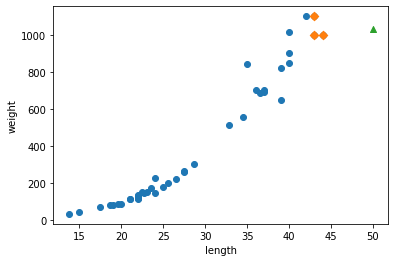

In [ ]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균화 한다  
> 따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측하게 된다  
> 본 예시에서는 길이가 100cm 농어도 여전히 1,033g으로 예측할 것이다

> ### 선형 회귀(linear regression)  
> * 대표적인 회귀 알고리즘으로서 특성을 가장 잘 나타내는 하나의 직선을 학습함 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
# 선형회귀 모델의 기울기와 절편 확인
# 기울기는 계수(coefficient) 혹은 가중치(weight) 라고 부른다
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


> * coef_와 intercept_는 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터라고 부른다  
> * 최적의 모델 파라미터를 찾는 학습을 **모델 기반 학습**이라고 한다  
> * k-최근접 이웃과 같이 모델 파라미터가 없는 학습을 **사례 기반 학습**이라고 부른다


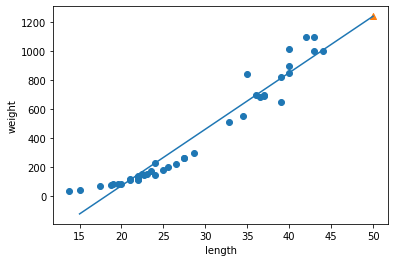

In [ ]:
# 선형회귀 모델을 통해 찾은 직선을 포함한 산점도 
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련 세트와 테스트 세트에 대한 성능 평가
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


> ### 다항회귀를 활용하여 최적의 곡선 찾기 
> * 2차 방정식의 그래프를 그리기 위해 농어의 길이를 제곱한 특성을 추가해 준다

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
# 계수와 절편 확인
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


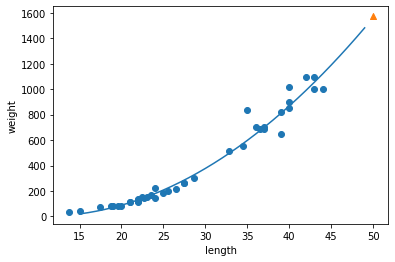

In [ ]:
# 다항회귀 모델을 통해 찾은 최적의 곡선을 포함한 산점도
# 구간별 직선을 이어서 곡선처럼 나타내기 위해 15-50 사이의 정수 배열 생성
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
# 15에서 49까지 2차방성식 그래프 그리기
plt.plot(point, 1.01 * point **2 - 21.6 * point + 116.05)
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 모델의 성능 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


3-3 특성 공학과 규제
=============
> ### 다항회귀의 과소적합 모델을 다중회귀로 해결하기
> * 농어의 길이 외에 농어의 높이, 두께 및 3개의 특성을 각각 제곱하고, 각 특성을 곱해서 또 다른 특성을 만들어 준다 
> * 이처럼 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성공학**이라고 한다 

In [ ]:
import pandas as pd
# 웹에서 length, height, width 특성 불러오기
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

> * 사이킷런은 특성을 만들거나 전처리 하기 위한 다양한 클래스를 제공
> * 사이킷런에서는 이런 클래스를 **변환기(transformer)**라고 부른다


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures 클래스 사용
# PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고, 특성끼리 곱한 항을 추가한다
poly = PolynomialFeatures(include_bias=False)
# 훈련세트를 기준으로 변환기 학습
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
# 9개의 특성이 어떻게 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
# 훈련세트 기준으로 테스트 세트 변환
test_poly = poly.transform(test_input)

In [ ]:
# 다중회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594134


> * 특성을 더 추가하면 어떻게 될까?
> * 5제곱까지 특성을 만들어 출력

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
# 선형회귀모델 훈련
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [ ]:
print(lr.score(test_poly, test_target))

-144.40579242684848


> * 훈련세트의 샘플개수인 42개보다 55개의 특성으로 훈련하면 완벽하게 학습되기 때문에 매우 과대적합한 현상이 발생함 

> ### 규제 혹은 정규화(regularization)는 과대적합이 발생하는 것을 방지해 줌 
> * 선형 회귀 모델에서 **규제**란 특성에 곱해지는 계수(가중치)의 크기를 작게 만들어 준다
> * 과대적합된 다중 회귀 모델은 단 하나의 특이값에도 기울기가 크게 변할수 있으므로, 규제를 통해 기울기가 덜 민감하게 반응하도록 하는 것
> * **특성의 스케일** : 스케일을 정규화시켜 규제를 적용할 때 공정하게 제어되도록 해야한다 

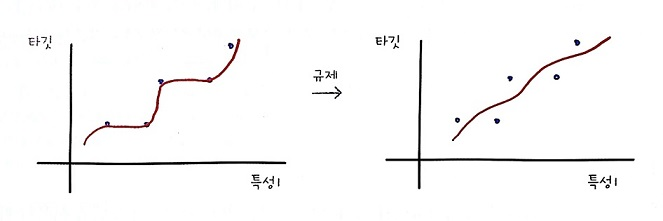

In [ ]:
# 사이킷런에서 제공하는 StandardScaler 클래스를 사용하여 특성을 정규화 해준다
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 훈련세트로 학습한 변환기를 사용해 테스트 세트까지 변환 
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

> ### 릿지회귀 (ridge)
> * 계수를 제곱한 값을 기준으로 규제를 적용

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


> * 릿지회귀와 라쏘 회귀는 alpha 값으로 규제의 강도를 조절한다
> * alpha 값이 크면 규제강도가 세지므로 과소적합되도록 유도한다
> * 반대로 alpha 값이 작으면 과대적합될 가능성이 커진다

In [ ]:
# 적절한 alpha 값을 찾기위해 결정계수 그래프를 그려본다
# 먼저 alpha 값을 바꿀 때마다 score() 결과를 저장할 리스트를 생성
train_score = []
test_score = []

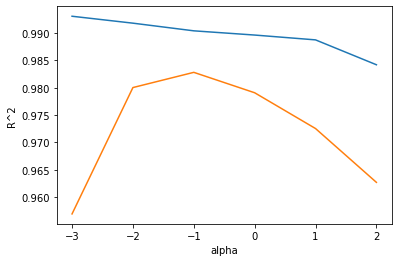

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:

  # 릿지모델 생성
  ridge = Ridge(alpha=alpha)

  # 릿지모델 훈련
  ridge.fit(train_scaled, train_target)

  # 훈련점수와 테스트점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# alpha_list 에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


> ### 라쏘회귀 (lasso)
> * 계수의 절댓값을 기준으로 규제를 적용

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
# 라쏘 모델의 규제 강도 조절
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:

  # 릿지모델 생성
  lasso = Lasso(alpha=alpha, max_iter=10000)

  # 릿지모델 훈련
  lasso.fit(train_scaled, train_target)

  # 훈련점수와 테스트점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


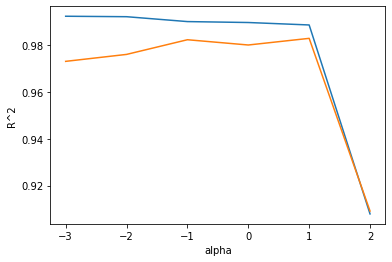

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


> * 라쏘모델은 계수 값을 아예 0으로 만들 수 있다
> * 이번 사례에서는 55개의 계수를 주입하였는데, 라쏘모델에서는 몇개의 특성을 사용하였는지 확인해 볼 수 있다
> * 또한 이런 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로 사용하기도 한다

In [ ]:
print(np.sum(lasso.coef_ == 0))

40
